In [1]:
import pycba as cba

In [2]:
spans = [4, 3, 9]
EI = [18e3, 120e3, 120e3]
supports = [-1, 0, 0, 0, -1, 0, -1, 0] # verti deflection, rotatin
loads = [
    [1, 1, 10, 0, 0], # beamnr, loadtype, force, start, stop
    [2, 1, 10, 0, 0],
    [3, 1, 10, 0, 0]
]
element_types = [2, 1, 1]

beam_model = cba.BeamAnalysis(spans, EI, supports, loads, element_types)
beam_model.analyze()

0

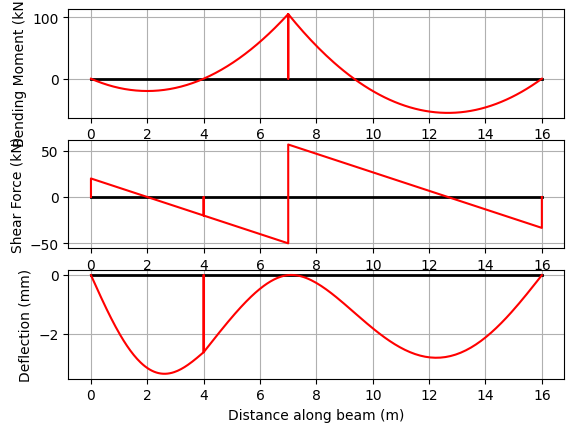

In [3]:
beam_model.plot_results()

In [4]:
# axle_spacings = [4.3, 6.5]
# axle_loads = [35, 145, 145]

axle_spacings = []
axle_loads = [35]

aashto_truck = cba.Vehicle(axle_spacings=axle_spacings,  axle_weights=axle_loads)

In [5]:
bridge_model = cba.BridgeAnalysis(beam_model, aashto_truck)

[] ['D', 'R', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_concatenate_results', '_member_analysis', '_member_values', 'npts', 'results', 'vRes']
[<pycba.load.MemberResults object at 0x7fe5de5e1640>, <pycba.load.MemberResults object at 0x7fe5de5e1af0>, <pycba.load.MemberResults object at 0x7fe5dc348b20>]


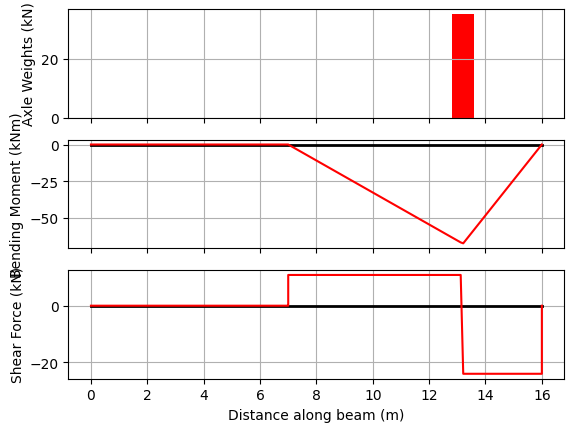

In [6]:
b = bridge_model.static_vehicle(pos=13.2, plotflag=True)
a = bridge_model.pos
print(a, dir(b))
print(b.vRes)

309 <class 'numpy.ndarray'>


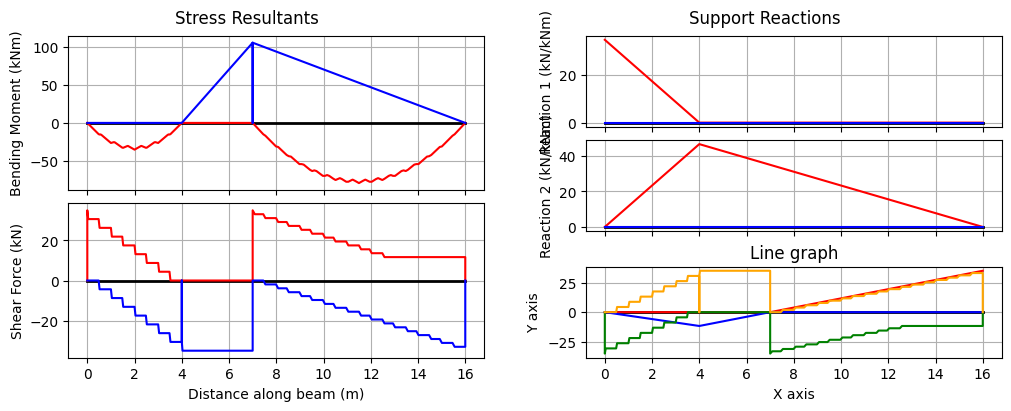

In [7]:
results_envelope = bridge_model.run_vehicle(step=0.5, plot_env=True)
Mmax = results_envelope.Mmax
Mmin = results_envelope.Mmin
Vmax = results_envelope.Vmax
Vmin = results_envelope.Vmin


pos_x = results_envelope.x

import matplotlib.pyplot as plt
print(len(Mmax), type(Mmax))


plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(pos_x, -Vmax, color ="green")
plt.plot(pos_x, -Vmin, color ="orange")
plt.show()

In [8]:
bridge_model.critical_values(results_envelope)

{'Mmax': {'val': 78.74999999999997, 'at': 11.5, 'pos': [11.5]},
 'Mmin': {'val': -104.99999999999994, 'at': 7.0, 'pos': [4.0]},
 'Vmax': {'val': 35.0, 'at': 0.0, 'pos': [0.0, 7.0]},
 'Vmin': {'val': -35.00000000000003,
  'at': 5.53,
  'pos': [4.0, 4.5, 5.0, 5.5, 6.0, 6.5]},
 'nsup': 3,
 'Rmax0': {'val': 35.0, 'pos': 0.0},
 'Rmin0': {'val': 0.0, 'pos': 0.0},
 'Rmax1': {'val': 46.66666666666674, 'pos': 4.0},
 'Rmin1': {'val': 0.0, 'pos': 0.0},
 'Rmax2': {'val': 35.0, 'pos': 16.0},
 'Rmin2': {'val': -11.666666666666652, 'pos': 4.0}}

In [10]:
# bridge_model.vResults[1].results.V
# bridge_model.vResults[40].R

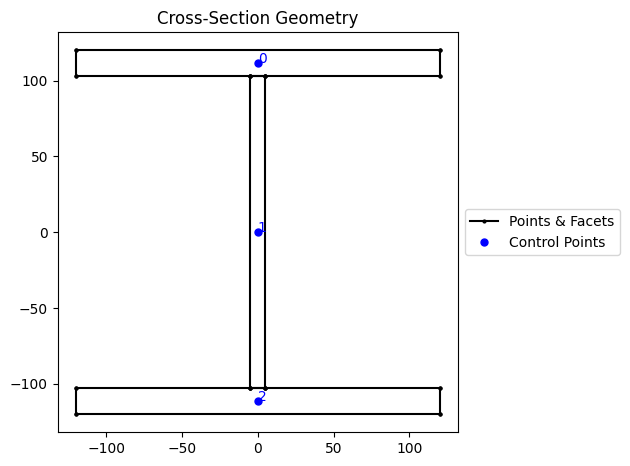

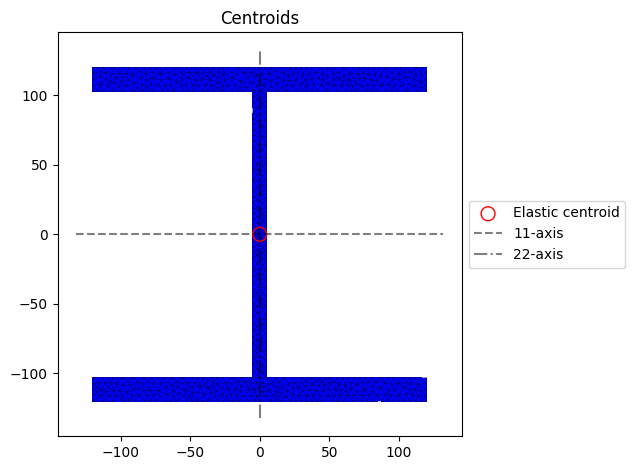

(21785705333333.312, 7837033333333.325, 0.00014495849609375084)

ixx=2.17857e+13

Ixx_expected=1.08929e+08

     Section Properties     
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property ┃         Value ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ A        │  1.022000e+04 │
│ Perim.   │  1.420000e+03 │
│ Mass     │  8.022700e+07 │
│ E.A      │  2.044000e+09 │
│ E.Qx     │  8.076429e-05 │
│ E.Qy     │ -2.112985e-05 │
│ cx       │ -1.033750e-14 │
│ cy       │  3.951286e-14 │
│ E.Ixx_g  │  2.178571e+13 │
│ E.Iyy_g  │  7.837033e+12 │
│ E.Ixy_g  │  1.449585e-04 │
│ E.Ixx_c  │  2.178571e+13 │
│ E.Iyy_c  │  7.837033e+12 │
│ E.Ixy_c  │  1.449585e-04 │
│ E.Zxx+   │  1.815475e+11 │
│ E.Zxx-   │  1.815475e+11 │
│ E.Zyy+   │  6.530861e+10 │
│ E.Zyy-   │  6.530861e+10 │
│ rx       │  1.032394e+02 │
│ ry       │  6.192063e+01 │
│ phi      │  0.000000e+00 │
│ E.I11_c  │  2.178571e+13 │
│ E.I22_c  │  7.837033e+12 │
│ E.Z11+   │  1.815475e+11 │
│ E.Z11-   │  1.815475e+11 │
│ E.Z22+   │  6.530861e+10 │
│ E.Z22-   │  6.530861e+10 │
│ r11      │  1.032394e+02 │
│ r22      │  6.192063e+01 │
│ E_eff    │  2.000000e+05 │
│ G_eff    │  7.692308e+04 │
│ nu_eff   │  3.000000e-01 │
└──────────┴───────────────┘

None

In [41]:
import sectionproperties.pre.library.primitive_sections as primitive_sections

from sectionproperties.analysis.section import Section
from sectionproperties.pre.pre import Material

# Define material
steel = Material(name='Steel', elastic_modulus=200e+3, poissons_ratio=0.3, density=7850,
             yield_strength=235, color='blue')

# Define parameters H section (a.k.a. W-section)
top_flange_width: int = 240
top_flange_height: int = 17
web_width: int = 10
web_height: int = 206
bot_flange_width: int = 240
bot_flange_height: int = 17

top_flange = primitive_sections.rectangular_section(top_flange_width, top_flange_height, material=steel)
top_flange = top_flange.shift_section(-top_flange_width / 2, web_height / 2)

web = primitive_sections.rectangular_section(web_width, web_height, material=steel)
web = web.shift_section(-web_width / 2, -web_height / 2)

bot_flange = primitive_sections.rectangular_section(bot_flange_width, bot_flange_height, material=steel)
bot_flange = bot_flange.shift_section(-bot_flange_width / 2, -web_height / 2 - bot_flange_height)


# Create commons nodes between primitive sections (makes no difference)
top_flange = top_flange - web 
bot_flange = bot_flange - web


geometry = top_flange + web + bot_flange
geometry.plot_geometry()

geometry.create_mesh(mesh_sizes=[15])
section = Section(geometry)
section.calculate_geometric_properties()


section.plot_centroids()
ixx, iyy, ixy = section.get_ic()
print(section.get_ic())
print(f"{ixx=:.5e}")

# If double symmetric
total_height = top_flange_height + web_height + bot_flange_height
Ixx_expected = 1/12*top_flange_width*total_height**3 - 1/12*(top_flange_width-web_width)*web_height**3
print(f"{Ixx_expected=:.5e}")
print(section.display_results())